<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/Activity_Recognition_EEG__Final_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Function

In [2]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)
  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)



def models_check_box(models):
  import ipywidgets as widgets
  from IPython.display import display
  new_keys=[]
  for i in models:
    i=widgets.Checkbox(
      value=False,
      description=str(i),
      disabled=False,
      indent=False
      )
    display(i)
    new_keys.append(i)
  return new_keys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Starting

In [18]:
import numpy as np
import pandas as pd
#dataset=pd.read_csv("/content/drive/MyDrive/EEG_CNU_Activity Recognition/EEG_CNU_Resting, walking, working and Reading_Control_2022.12.05.csv")
 
dataset=pd.read_excel("/content/drive/MyDrive/Iqram Sir/EEG_CNU_Resting, walking, working and Reading_Control_2022.12.22.xlsx")

classes = np.array(sorted(list(set(dataset.iloc[:, 1]))))
target = "Activity"
result = {}

In [19]:
dataset.head()

,Activity,Status,Epoch,MeanP_Alpha_Fz,MedianF_Alpha_Fz,MeanF_Alpha_Fz,Spectral Edge_Alpha_Fz,PeakF_Alpha_Fz,MeanP_Beta_Fz,MedianF_Beta_Fz,...,Relative Power_Alpha_Global,Relative Power_Beta_Global,Relative Power_Theta_Global,Relative Power_Delta_Global,Relative Power_Gamma_Global,∆Relative Power_Alpha_Global,∆Relative Power_Beta_Global,∆Relative Power_Theta_Global,∆Relative Power_Delta_Global,∆Relative Power_Gamma_Global
0,Resting,Control,0,0.000008,11.70732,28.29268,20.00000,10.73171,0.000017,19.51220,...,0.358154,0.639771,0.749628,4.031903,0.220545,-0.273666,-0.164639,-0.009611,0.107193,-0.356230
1,Resting,Control,1,0.000010,10.73171,28.78049,22.43902,10.24390,0.000023,22.92683,...,0.457695,0.806208,0.723662,3.759249,0.253186,-0.071797,0.052680,-0.043916,0.032320,-0.260950
2,Resting,Control,2,0.000008,13.17073,28.78049,23.41463,9.26829,0.000023,22.43902,...,0.501419,1.059244,0.737332,3.320235,0.381769,0.016875,0.383074,-0.025855,-0.088237,0.114385
3,Resting,Control,3,0.000011,10.24390,27.80488,18.53659,10.73171,0.000019,22.43902,...,0.497909,0.710690,0.907816,3.653423,0.230162,0.009757,-0.072039,0.199384,0.003259,-0.328157
4,Resting,Control,4,0.000007,10.73171,23.41463,18.04878,11.70732,0.000010,17.56098,...,0.429825,0.569204,0.849345,4.001597,0.150029,-0.128318,-0.256780,0.122134,0.098870,-0.562065


In [20]:
dataset.shape

(1711, 259)

In [21]:
dataset[target].value_counts()

Reading    793
Walking    408
Working    267
Resting    243
Name: Activity, dtype: int64

In [22]:
set(list(dataset['Activity']))

{'Reading', 'Resting', 'Walking', 'Working'}

In [23]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [24]:
set(list(dataset['Activity']))

{0, 1, 2, 3}

###Spliting into X and y

In [25]:
X =  dataset.loc[:,dataset.columns != target]  # removing Activity 
X =  X.loc[:,X.columns != "Status"]            # removing Status
X =  X.loc[:,X.columns != "Epoch"]             # removing Epoch
y = dataset["Activity"]

X.head(10)

,MeanP_Alpha_Fz,MedianF_Alpha_Fz,MeanF_Alpha_Fz,Spectral Edge_Alpha_Fz,PeakF_Alpha_Fz,MeanP_Beta_Fz,MedianF_Beta_Fz,MeanF_Beta_Fz,Spectral Edge_Beta_Fz,PeakF_Beta_Fz,...,Relative Power_Alpha_Global,Relative Power_Beta_Global,Relative Power_Theta_Global,Relative Power_Delta_Global,Relative Power_Gamma_Global,∆Relative Power_Alpha_Global,∆Relative Power_Beta_Global,∆Relative Power_Theta_Global,∆Relative Power_Delta_Global,∆Relative Power_Gamma_Global
0,0.000008,11.70732,28.29268,20.00000,10.73171,0.000017,19.51220,38.04878,32.68293,19.02439,...,0.358154,0.639771,0.749628,4.031903,0.220545,-0.273666,-0.164639,-0.009611,0.107193,-0.356230
1,0.000010,10.73171,28.78049,22.43902,10.24390,0.000023,22.92683,38.53659,33.65854,23.41463,...,0.457695,0.806208,0.723662,3.759249,0.253186,-0.071797,0.052680,-0.043916,0.032320,-0.260950
2,0.000008,13.17073,28.78049,23.41463,9.26829,0.000023,22.43902,37.56098,31.70732,17.56098,...,0.501419,1.059244,0.737332,3.320235,0.381769,0.016875,0.383074,-0.025855,-0.088237,0.114385
3,0.000011,10.24390,27.80488,18.53659,10.73171,0.000019,22.43902,38.04878,32.68293,28.29268,...,0.497909,0.710690,0.907816,3.653423,0.230162,0.009757,-0.072039,0.199384,0.003259,-0.328157
4,0.000007,10.73171,23.41463,18.04878,11.70732,0.000010,17.56098,36.09756,29.26829,11.70732,...,0.429825,0.569204,0.849345,4.001597,0.150029,-0.128318,-0.256780,0.122134,0.098870,-0.562065
5,0.000008,10.24390,23.41463,17.56098,10.24390,0.000010,18.04878,36.09756,29.26829,17.07317,...,0.494096,0.687221,0.812251,3.785048,0.221383,0.002023,-0.102682,0.073126,0.039404,-0.353782
6,0.000005,11.21951,24.39024,17.56098,12.68293,0.000007,17.07317,38.04878,31.21951,14.14634,...,0.527217,0.668711,0.770164,3.853441,0.180467,0.069192,-0.126852,0.017521,0.058186,-0.473217
7,0.000005,9.75610,25.85366,18.53659,7.80488,0.000007,19.02439,35.60976,29.75610,13.17073,...,0.475599,0.719244,0.764508,3.833454,0.207195,-0.035489,-0.060870,0.010050,0.052697,-0.395197
8,0.000006,10.24390,24.39024,17.56098,8.29268,0.000009,17.56098,36.09756,29.26829,17.56098,...,0.482293,0.620810,0.933737,3.798965,0.164195,-0.021913,-0.189396,0.233631,0.043226,-0.520716
9,0.000014,11.21951,23.41463,18.04878,12.68293,0.000021,18.04878,35.60976,29.26829,12.68293,...,0.659929,0.855344,1.188749,3.079654,0.216324,0.338331,0.116839,0.570546,-0.154303,-0.368549


###USing SMOTE for balancing

In [26]:
new_dataset =  balance(X,y)

In [27]:
new_dataset[target].value_counts()

1    793
2    793
0    793
3    793
Name: Activity, dtype: int64

#Feature Selection

In [41]:
number_of_feat = 20

###ANOVA with f classifciation

In [29]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd



fs = SelectKBest(score_func=f_classif, k=5)
fit = fs.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_ANOVA'] 

lyst = featureScores.nlargest(number_of_feat,'Score_ANOVA')

#lyst.to_csv('Filter_Method_ANOVA_with_f_classif.csv')

list_of_feat = list(lyst["Best_columns"])

###Embedded Method

In [34]:

from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

list_of_feat=[]


for i in range(coef.shape[0]):
  if coef[i]!=0:
    list_of_feat.append(dataset.iloc[:0,i+3].name)
    
df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Embedded_Method.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4267169530156707, tolerance: 0.21672448830409385
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5367691825176735, tolerance: 0.21672448830409385
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44178979448417977, tolerance: 0.21672448830409385
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:633: Converge

Best alpha using built-in LassoCV: 0.026444
Best score using built-in LassoCV: 0.462189
Lasso picked 76 variables and eliminated the other 180 variables


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.166e+02, tolerance: 2.256e-01
  model = cd_fast.enet_coordinate_descent(


###Pearson's with f regression

In [31]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import pandas as pd


fs = SelectKBest(score_func=f_regression, k=5)
fit = fs.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

featureScores.columns = ['Best_columns','Score_pearsons'] 


lyst = featureScores.nlargest(number_of_feat,'Score_pearsons')

#lyst.to_csv('Filter_Method_Pearson’s_with_f_regression.csv')

list_of_feat = list(lyst["Best_columns"])

###Sequential Feature Selection

In [32]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=number_of_feat)
sfs.fit(X, y)
list_of_feat=[]
list_of_feat=list(sfs.get_feature_names_out(X.columns))

df = pd.DataFrame(list_of_feat, columns=['Best_Features'])

#df.to_csv("Filter_Method_Sequential_feat_Selection_KNN.csv")

list_of_feat = list(df["Best_Features"])
if number_of_feat < len(list_of_feat):
  list_of_feat = list_of_feat[:number_of_feat]

###All features

In [33]:
list_of_feat = list(X.columns)

#Data Spliting

In [44]:
X_new = new_dataset[list_of_feat]
y_new = new_dataset[target]

In [45]:
X_new.shape

(3172, 20)

In [46]:
y_new.shape

(3172,)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)



---





---



#ADABOOST

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier(random_state=0)
ada_defult.fit(X_train, y_train)
y_pred = ada_defult.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_defult,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)


[[ 64  54  27  18]
 [ 27  78  30  10]
 [ 19  33  77  39]
 [  7  10  31 111]]
              precision    recall  f1-score   support

           0       0.55      0.39      0.46       163
           1       0.45      0.54      0.49       145
           2       0.47      0.46      0.46       168
           3       0.62      0.70      0.66       159

    accuracy                           0.52       635
   macro avg       0.52      0.52      0.52       635
weighted avg       0.52      0.52      0.52       635

Accurecy:  0.5196850393700787


1/90 round completed......................... Accurecy: 0.3921259842519685
2/90 round completed......................... Accurecy: 0.45984251968503936
3/90 round completed......................... Accurecy: 0.46771653543307085
4/90 round completed......................... Accurecy: 0.46771653543307085
5/90 round completed......................... Accurecy: 0.47874015748031495
6/90 round completed......................... Accurecy: 0.5338582677165354
7/90 round completed......................... Accurecy: 0.5291338582677165
8/90 round completed......................... Accurecy: 0.5322834645669291
9/90 round completed......................... Accurecy: 0.5275590551181102
10/90 round completed......................... Accurecy: 0.5228346456692914
11/90 round completed......................... Accurecy: 0.537007874015748
12/90 round completed......................... Accurecy: 0.5039370078740157
13/90 round completed......................... Accurecy: 0.5165354330708661
14/90 round comple

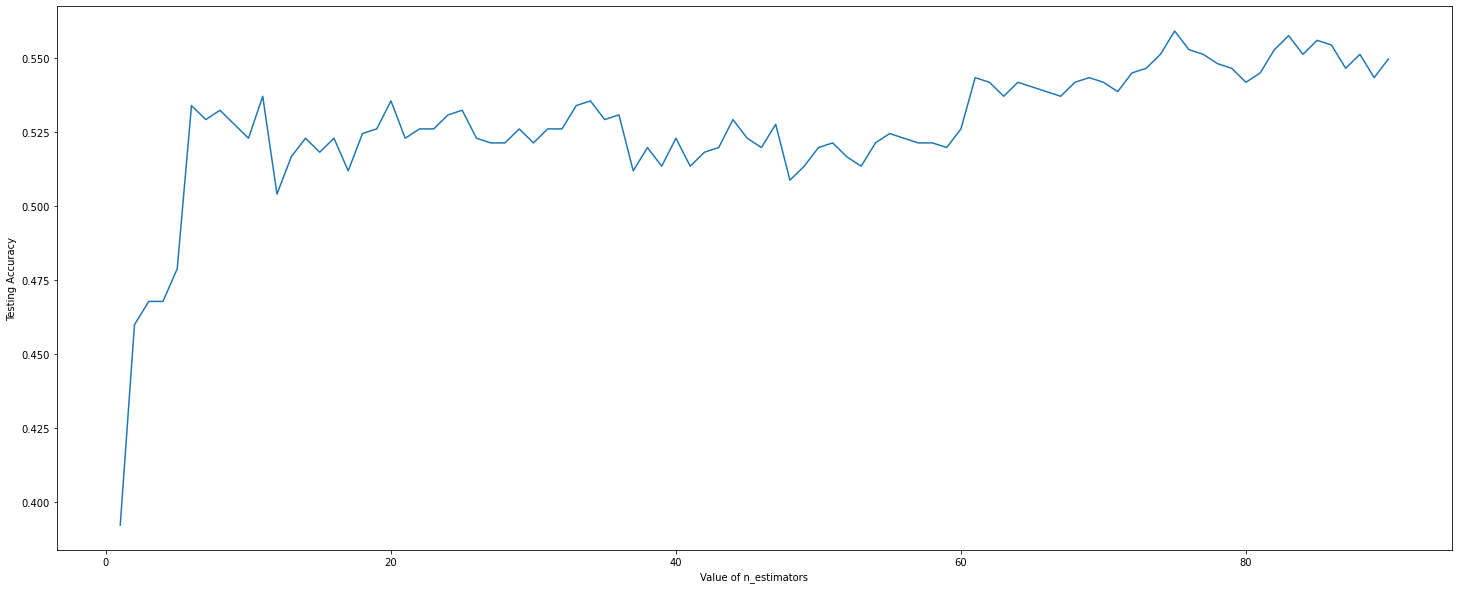

In [49]:
from sklearn.ensemble import AdaBoostClassifier
N=90
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [50]:
from sklearn.ensemble import AdaBoostClassifier

ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(ada_best_estimator,1,'AdaBoostClassifier')]=accuracy_score(y_test, y_pred)

[[ 77  43  29  14]
 [ 27  88  20  10]
 [ 24  26  78  40]
 [  9   8  30 112]]
              precision    recall  f1-score   support

           0       0.56      0.47      0.51       163
           1       0.53      0.61      0.57       145
           2       0.50      0.46      0.48       168
           3       0.64      0.70      0.67       159

    accuracy                           0.56       635
   macro avg       0.56      0.56      0.56       635
weighted avg       0.56      0.56      0.56       635

Accurecy:  0.5590551181102362




---



---



#Graddient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

gradBoost_default = GradientBoostingClassifier(random_state=0)
gradBoost_default.fit(X_train, y_train)
y_pred = gradBoost_default.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_default,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[121  13  17  12]
 [ 26 111   4   4]
 [ 21  24  94  29]
 [  6  11  23 119]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       163
           1       0.70      0.77      0.73       145
           2       0.68      0.56      0.61       168
           3       0.73      0.75      0.74       159

    accuracy                           0.70       635
   macro avg       0.70      0.70      0.70       635
weighted avg       0.70      0.70      0.70       635

Accurecy:  0.7007874015748031


1/175 round completed......................... Accurecy: 0.5606299212598426
2/175 round completed......................... Accurecy: 0.5779527559055118
3/175 round completed......................... Accurecy: 0.5826771653543307
4/175 round completed......................... Accurecy: 0.5858267716535434
5/175 round completed......................... Accurecy: 0.5826771653543307
6/175 round completed......................... Accurecy: 0.5811023622047244
7/175 round completed......................... Accurecy: 0.5905511811023622
8/175 round completed......................... Accurecy: 0.5952755905511811
9/175 round completed......................... Accurecy: 0.5937007874015748
10/175 round completed......................... Accurecy: 0.5984251968503937
11/175 round completed......................... Accurecy: 0.584251968503937
12/175 round completed......................... Accurecy: 0.5921259842519685
13/175 round completed......................... Accurecy: 0.5937007874015748
14/175 ro

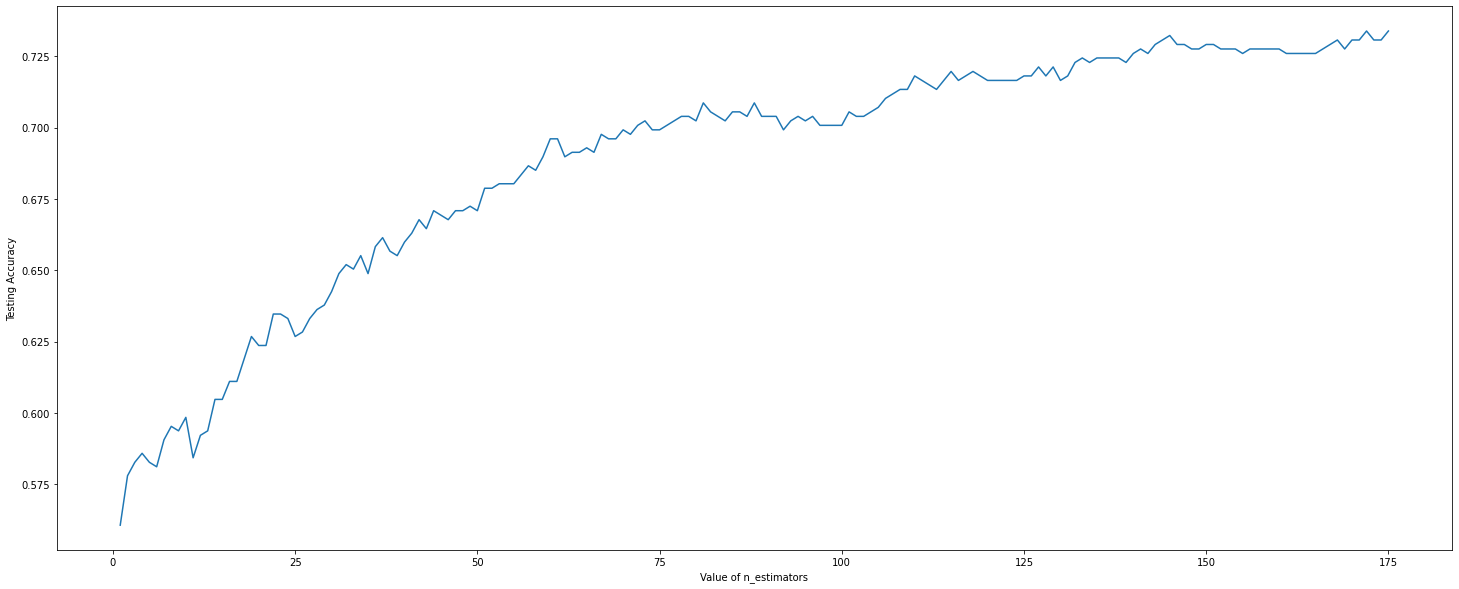

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=175
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/14 round completed......................... Accurecy: 0.6157480314960629
2/14 round completed......................... Accurecy: 0.6724409448818898
3/14 round completed......................... Accurecy: 0.7007874015748031
4/14 round completed......................... Accurecy: 0.7401574803149606
5/14 round completed......................... Accurecy: 0.75748031496063
6/14 round completed......................... Accurecy: 0.768503937007874
7/14 round completed......................... Accurecy: 0.7748031496062993
8/14 round completed......................... Accurecy: 0.7795275590551181
9/14 round completed......................... Accurecy: 0.7716535433070866
10/14 round completed......................... Accurecy: 0.75748031496063
11/14 round completed......................... Accurecy: 0.784251968503937
12/14 round completed......................... Accurecy: 0.7858267716535433
13/14 round completed......................... Accurecy: 0.7496062992125985
14/14 round completed......

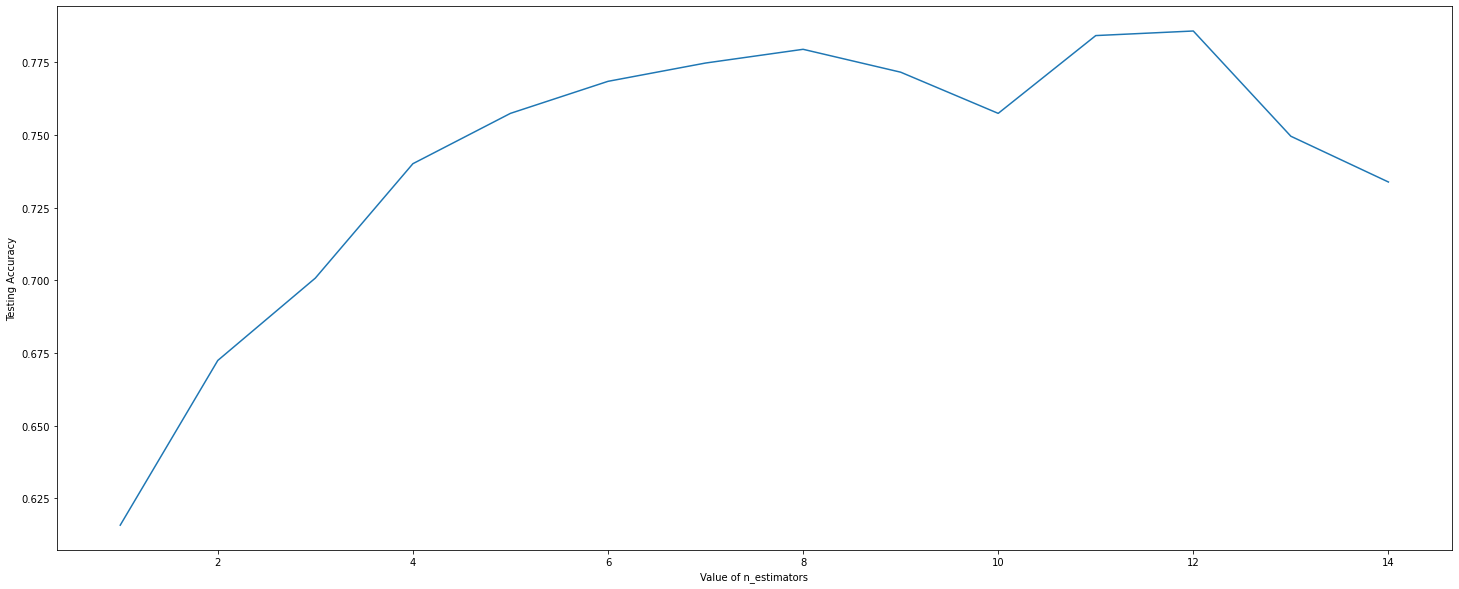

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=14
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(gradBoost_estimator,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[128   8  18   9]
 [ 23 117   3   2]
 [ 25  17 100  26]
 [  8   9  21 121]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.74       163
           1       0.77      0.81      0.79       145
           2       0.70      0.60      0.65       168
           3       0.77      0.76      0.76       159

    accuracy                           0.73       635
   macro avg       0.74      0.74      0.73       635
weighted avg       0.73      0.73      0.73       635

Accurecy:  0.7338582677165354


In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_depth,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[123  11  19  10]
 [ 18 122   5   0]
 [ 16  10 119  23]
 [  8   5  11 135]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       163
           1       0.82      0.84      0.83       145
           2       0.77      0.71      0.74       168
           3       0.80      0.85      0.83       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.78       635

Accurecy:  0.7858267716535433


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result[(gradBoost_all,2,'GradientBoostingClassifier')]=accuracy_score(y_test, y_pred)

[[123   8  21  11]
 [ 19 121   5   0]
 [ 17   9 120  22]
 [  9   4  11 135]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       163
           1       0.85      0.83      0.84       145
           2       0.76      0.71      0.74       168
           3       0.80      0.85      0.83       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7858267716535433




---



---



#Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier(random_state=0)
rf_default.fit(X_train, y_train)
y_pred=rf_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_default,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[115  14  19  15]
 [ 18 121   4   2]
 [ 10  16 121  21]
 [ 10   3  15 131]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       163
           1       0.79      0.83      0.81       145
           2       0.76      0.72      0.74       168
           3       0.78      0.82      0.80       159

    accuracy                           0.77       635
   macro avg       0.77      0.77      0.77       635
weighted avg       0.77      0.77      0.77       635

Accurecy:  0.768503937007874


1/150 round completed......................... Accurecy: 0.5889763779527559
2/150 round completed......................... Accurecy: 0.5921259842519685
3/150 round completed......................... Accurecy: 0.6535433070866141
4/150 round completed......................... Accurecy: 0.6787401574803149
5/150 round completed......................... Accurecy: 0.7133858267716535
6/150 round completed......................... Accurecy: 0.7086614173228346
7/150 round completed......................... Accurecy: 0.7165354330708661
8/150 round completed......................... Accurecy: 0.7291338582677165
9/150 round completed......................... Accurecy: 0.7307086614173228
10/150 round completed......................... Accurecy: 0.7338582677165354
11/150 round completed......................... Accurecy: 0.7496062992125985
12/150 round completed......................... Accurecy: 0.7511811023622047
13/150 round completed......................... Accurecy: 0.7448818897637796
14/150 r

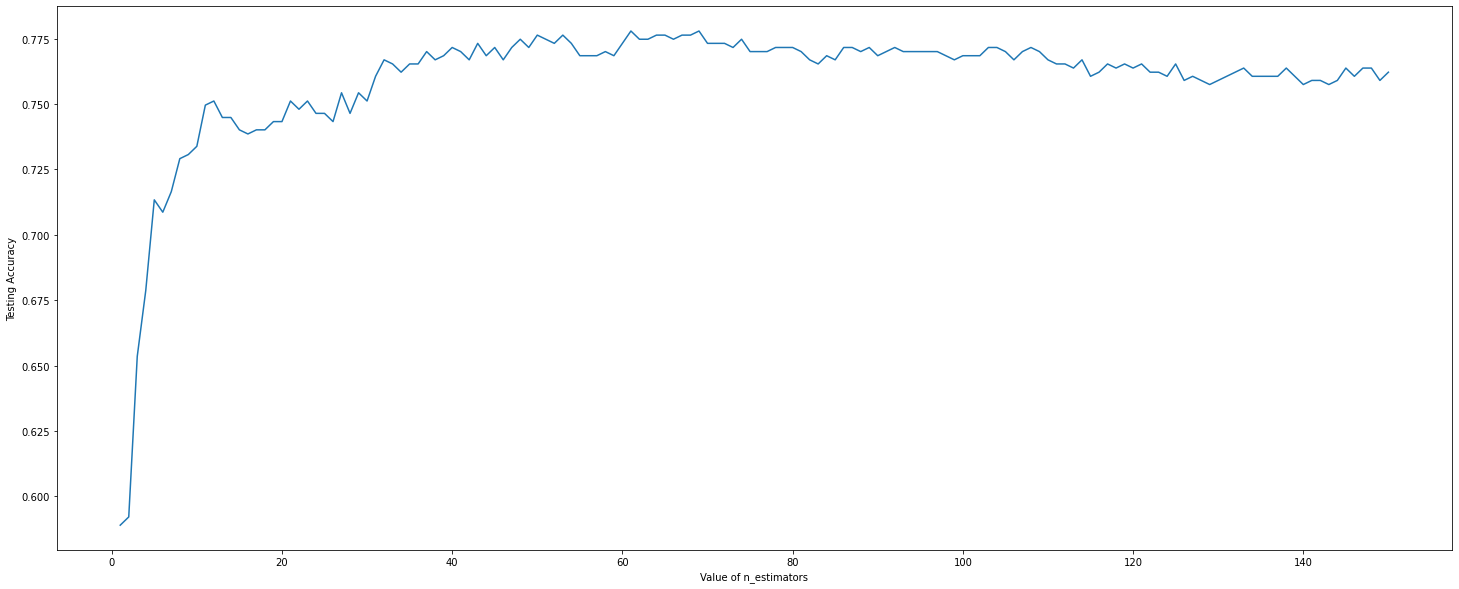

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.46771653543307085
2/30 round completed......................... Accurecy: 0.5322834645669291
3/30 round completed......................... Accurecy: 0.5716535433070866
4/30 round completed......................... Accurecy: 0.5889763779527559
5/30 round completed......................... Accurecy: 0.584251968503937
6/30 round completed......................... Accurecy: 0.6204724409448819
7/30 round completed......................... Accurecy: 0.6409448818897637
8/30 round completed......................... Accurecy: 0.6724409448818898
9/30 round completed......................... Accurecy: 0.6976377952755906
10/30 round completed......................... Accurecy: 0.705511811023622
11/30 round completed......................... Accurecy: 0.7259842519685039
12/30 round completed......................... Accurecy: 0.7433070866141732
13/30 round completed......................... Accurecy: 0.7433070866141732
14/30 round completed.

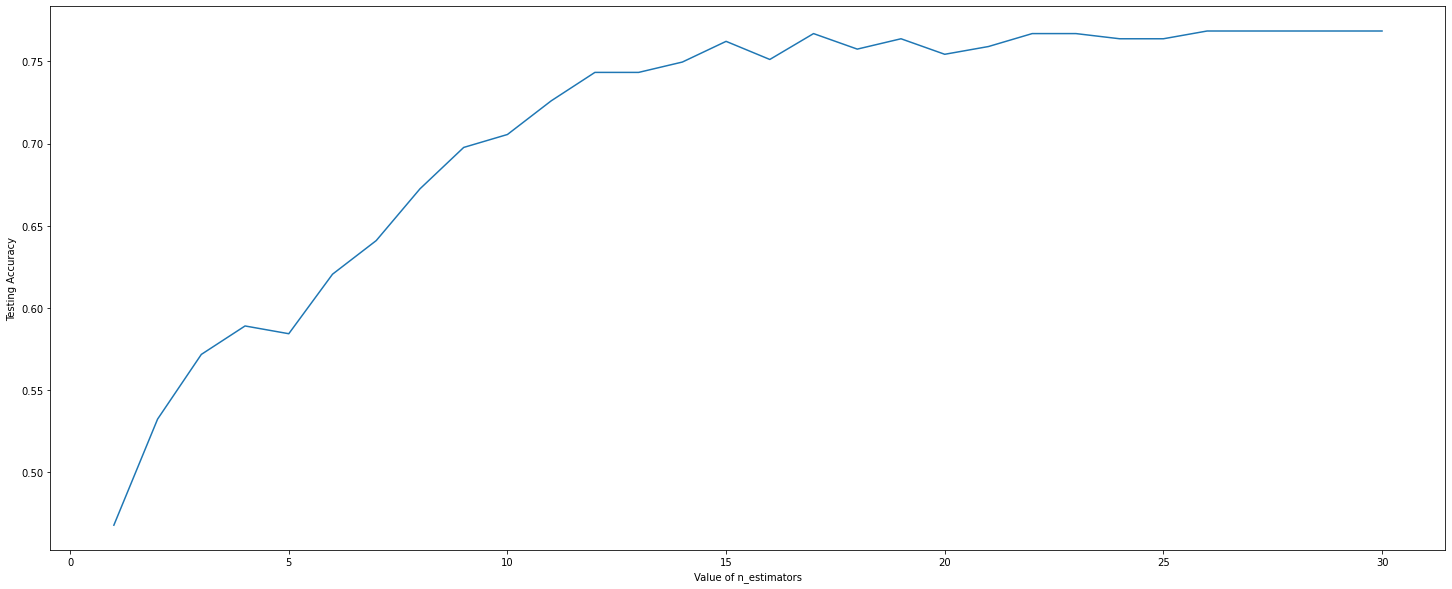

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_estimator,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[119  15  15  14]
 [ 18 121   3   3]
 [ 10  14 122  22]
 [  9   3  15 132]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       163
           1       0.79      0.83      0.81       145
           2       0.79      0.73      0.76       168
           3       0.77      0.83      0.80       159

    accuracy                           0.78       635
   macro avg       0.78      0.78      0.78       635
weighted avg       0.78      0.78      0.78       635

Accurecy:  0.7779527559055118


In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_depth,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[115  14  19  15]
 [ 18 121   4   2]
 [ 10  16 121  21]
 [ 10   3  15 131]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       163
           1       0.79      0.83      0.81       145
           2       0.76      0.72      0.74       168
           3       0.78      0.82      0.80       159

    accuracy                           0.77       635
   macro avg       0.77      0.77      0.77       635
weighted avg       0.77      0.77      0.77       635

Accurecy:  0.768503937007874


In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(rf_all,3,'RandomForestClassifier')]=accuracy_score(y_test, y_pred)

[[119  15  15  14]
 [ 18 121   3   3]
 [ 10  14 122  22]
 [  9   3  15 132]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       163
           1       0.79      0.83      0.81       145
           2       0.79      0.73      0.76       168
           3       0.77      0.83      0.80       159

    accuracy                           0.78       635
   macro avg       0.78      0.78      0.78       635
weighted avg       0.78      0.78      0.78       635

Accurecy:  0.7779527559055118




---



---



#XGB

In [63]:


import xgboost as xgb
xgb_deafult = xgb.XGBClassifier(random_state=0)
xgb_deafult.fit(X_train,y_train)
y_pred = xgb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_deafult,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[118  17  16  12]
 [ 25 109   5   6]
 [ 21  29  88  30]
 [  6   7  26 120]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.71       163
           1       0.67      0.75      0.71       145
           2       0.65      0.52      0.58       168
           3       0.71      0.75      0.73       159

    accuracy                           0.69       635
   macro avg       0.68      0.69      0.68       635
weighted avg       0.68      0.69      0.68       635

Accurecy:  0.6850393700787402


1/250 round completed......................... Accurecy: 0.5669291338582677
2/250 round completed......................... Accurecy: 0.5779527559055118
3/250 round completed......................... Accurecy: 0.5811023622047244
4/250 round completed......................... Accurecy: 0.584251968503937
5/250 round completed......................... Accurecy: 0.5874015748031496
6/250 round completed......................... Accurecy: 0.5889763779527559
7/250 round completed......................... Accurecy: 0.5889763779527559
8/250 round completed......................... Accurecy: 0.5874015748031496
9/250 round completed......................... Accurecy: 0.5858267716535434
10/250 round completed......................... Accurecy: 0.5905511811023622
11/250 round completed......................... Accurecy: 0.5921259842519685
12/250 round completed......................... Accurecy: 0.5921259842519685
13/250 round completed......................... Accurecy: 0.5905511811023622
14/250 ro

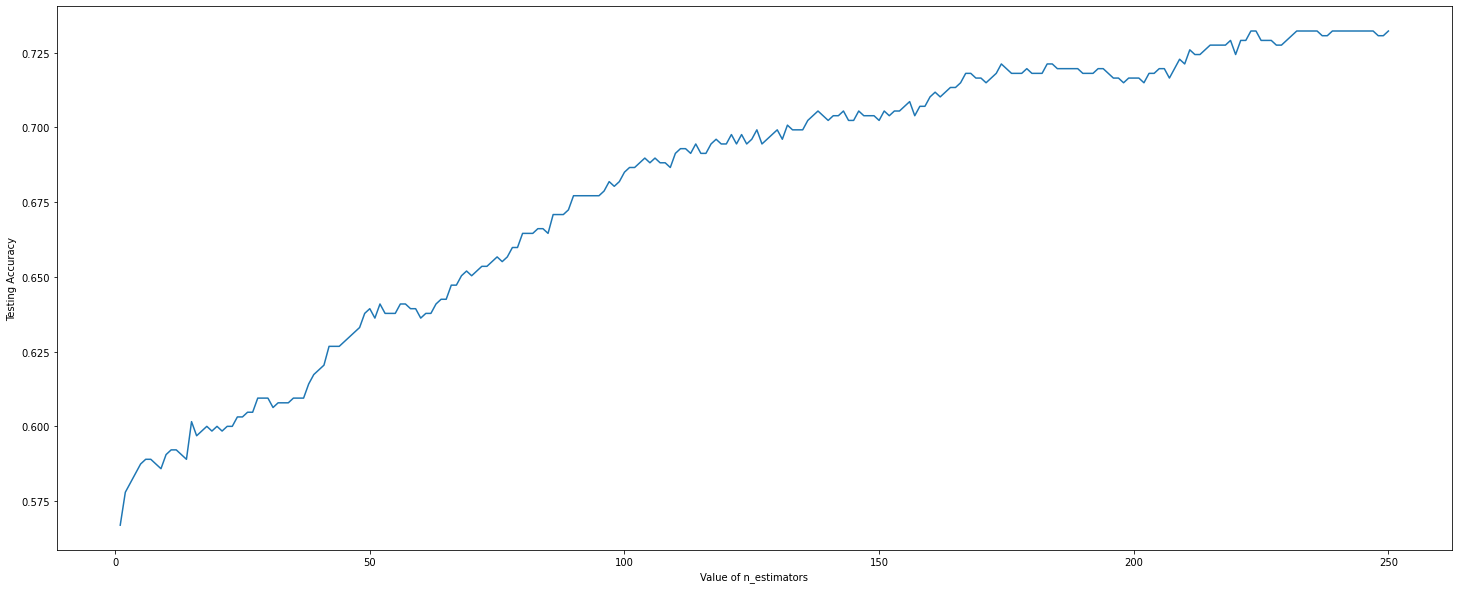

In [64]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.5811023622047244
2/250 round completed......................... Accurecy: 0.6220472440944882
3/250 round completed......................... Accurecy: 0.6850393700787402
4/250 round completed......................... Accurecy: 0.7196850393700788
5/250 round completed......................... Accurecy: 0.7511811023622047
6/250 round completed......................... Accurecy: 0.7748031496062993
7/250 round completed......................... Accurecy: 0.7716535433070866
8/250 round completed......................... Accurecy: 0.7905511811023622
9/250 round completed......................... Accurecy: 0.7795275590551181
10/250 round completed......................... Accurecy: 0.7748031496062993
11/250 round completed......................... Accurecy: 0.7732283464566929
12/250 round completed......................... Accurecy: 0.784251968503937
13/250 round completed......................... Accurecy: 0.7700787401574803
14/250 ro

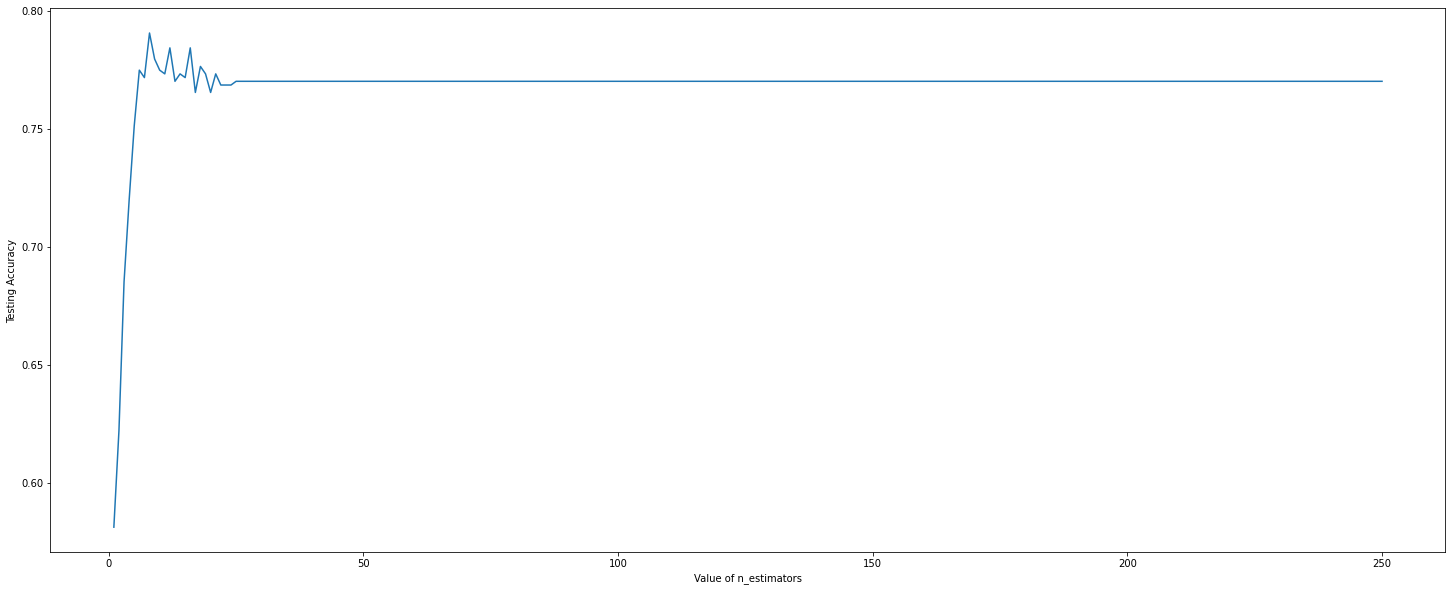

In [65]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [66]:
import xgboost as xgb
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train,y_train)
y_pred = xgb_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_depth,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_depth)

[[128  10  14  11]
 [ 14 127   4   0]
 [ 18  11 118  21]
 [  8   5  17 129]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       163
           1       0.83      0.88      0.85       145
           2       0.77      0.70      0.74       168
           3       0.80      0.81      0.81       159

    accuracy                           0.79       635
   macro avg       0.79      0.79      0.79       635
weighted avg       0.79      0.79      0.79       635

Accurecy:  0.7905511811023622
XGBClassifier(max_depth=8, objective='multi:softprob')


In [67]:
import xgboost as xgb
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train,y_train)
y_pred = xgb_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_estimator,4,'xgboost')]=accuracy_score(y_test, y_pred)
print(xgb_estimator)

[[126  10  17  10]
 [ 23 116   3   3]
 [ 23  18 101  26]
 [  6   7  24 122]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       163
           1       0.77      0.80      0.78       145
           2       0.70      0.60      0.65       168
           3       0.76      0.77      0.76       159

    accuracy                           0.73       635
   macro avg       0.73      0.74      0.73       635
weighted avg       0.73      0.73      0.73       635

Accurecy:  0.7322834645669292
XGBClassifier(n_estimators=223, objective='multi:softprob')


In [68]:
import xgboost as xgb
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train,y_train)
y_pred = xgb_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(xgb_all,4,'xgboost')]=accuracy_score(y_test, y_pred)

[[131   9  14   9]
 [ 14 126   5   0]
 [ 17  12 119  20]
 [  9   5  14 131]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       163
           1       0.83      0.87      0.85       145
           2       0.78      0.71      0.74       168
           3       0.82      0.82      0.82       159

    accuracy                           0.80       635
   macro avg       0.80      0.80      0.80       635
weighted avg       0.80      0.80      0.80       635

Accurecy:  0.7984251968503937


#KNN

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred=knn_default.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_default,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 91  35  22  15]
 [ 21 116   1   7]
 [ 14  23 109  22]
 [ 15   1  18 125]]
              precision    recall  f1-score   support

           0       0.65      0.56      0.60       163
           1       0.66      0.80      0.72       145
           2       0.73      0.65      0.69       168
           3       0.74      0.79      0.76       159

    accuracy                           0.69       635
   macro avg       0.69      0.70      0.69       635
weighted avg       0.69      0.69      0.69       635

Accurecy:  0.694488188976378


1/105 round completed......................... Accurecy: 0.7716535433070866
2/105 round completed......................... Accurecy: 0.7149606299212599
3/105 round completed......................... Accurecy: 0.7070866141732284
4/105 round completed......................... Accurecy: 0.694488188976378
5/105 round completed......................... Accurecy: 0.694488188976378
6/105 round completed......................... Accurecy: 0.6771653543307087
7/105 round completed......................... Accurecy: 0.658267716535433
8/105 round completed......................... Accurecy: 0.6708661417322834
9/105 round completed......................... Accurecy: 0.6724409448818898
10/105 round completed......................... Accurecy: 0.6598425196850394
11/105 round completed......................... Accurecy: 0.6551181102362205
12/105 round completed......................... Accurecy: 0.6440944881889764
13/105 round completed......................... Accurecy: 0.6456692913385826
14/105 roun

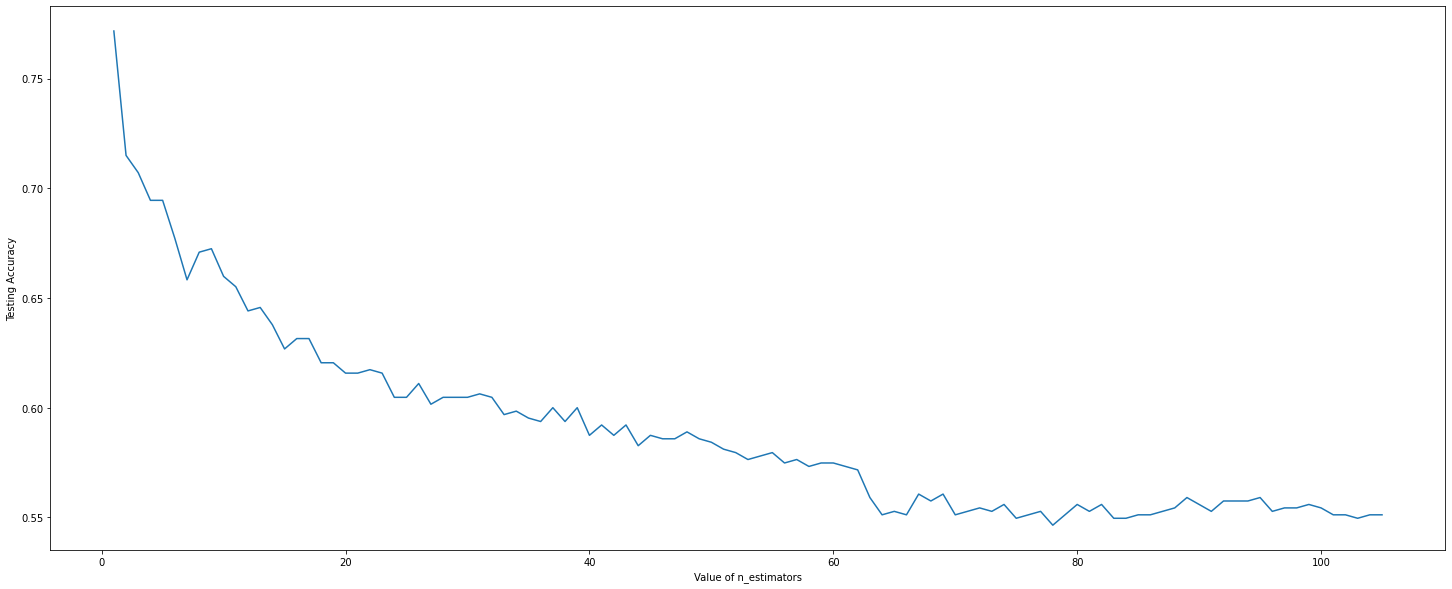

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=105
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn_neighbors = KNeighborsClassifier(n_neighbors=best)
knn_neighbors.fit(X_train, y_train)
y_pred=knn_neighbors.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(knn_neighbors,5,'KNeighborsClassifier')]=accuracy_score(y_test, y_pred)

[[ 85  33  29  16]
 [  9 132   2   2]
 [ 12  15 128  13]
 [  5   1   8 145]]
              precision    recall  f1-score   support

           0       0.77      0.52      0.62       163
           1       0.73      0.91      0.81       145
           2       0.77      0.76      0.76       168
           3       0.82      0.91      0.87       159

    accuracy                           0.77       635
   macro avg       0.77      0.78      0.77       635
weighted avg       0.77      0.77      0.76       635

Accurecy:  0.7716535433070866


#NB

In [72]:
from sklearn.naive_bayes import GaussianNB

nb_deafult = GaussianNB()
nb_deafult.fit(X_train, y_train)
y_pred = nb_deafult.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result[(nb_deafult,6,'GaussianNB')]=accuracy_score(y_test, y_pred)

[[ 77   0   2  84]
 [ 84   1  10  50]
 [ 43   1   9 115]
 [  9   0   4 146]]
              precision    recall  f1-score   support

           0       0.36      0.47      0.41       163
           1       0.50      0.01      0.01       145
           2       0.36      0.05      0.09       168
           3       0.37      0.92      0.53       159

    accuracy                           0.37       635
   macro avg       0.40      0.36      0.26       635
weighted avg       0.39      0.37      0.26       635

Accurecy:  0.3669291338582677




---



---



#Result

In [73]:

models=[]

for i in result:
  models.append(i[0])
  print(i[0],i[1]," : ",result[i])
  print("---------------------------------------------------------------")
  print()


AdaBoostClassifier(random_state=0) 1  :  0.5196850393700787
---------------------------------------------------------------

AdaBoostClassifier(n_estimators=75, random_state=0) 1  :  0.5590551181102362
---------------------------------------------------------------

GradientBoostingClassifier(random_state=0) 2  :  0.7007874015748031
---------------------------------------------------------------

GradientBoostingClassifier(n_estimators=172, random_state=0) 2  :  0.7338582677165354
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=12, random_state=0) 2  :  0.7858267716535433
---------------------------------------------------------------

GradientBoostingClassifier(max_depth=12, n_estimators=172, random_state=0) 2  :  0.7858267716535433
---------------------------------------------------------------

RandomForestClassifier(random_state=0) 3  :  0.768503937007874
---------------------------------------------------------------

RandomFor

In [74]:
sorted_list=[]
sorted_list = sorted(result, key=result.get,reverse=True)

for i in sorted_list:
  print(i,"  : ",result[i])
  print("-------------------------------------------------------------------------------------------------")

print(sorted_list)


flage=[]
best_models=[]
it=0

for i in sorted_list:
  if it==4:
    break

  if i[1] not in flage:
    best_models.append((i[0],i[2]))
    flage.append(i[1])
    it+=1


(XGBClassifier(max_depth=8, n_estimators=223, objective='multi:softprob'), 4, 'xgboost')   :  0.7984251968503937
-------------------------------------------------------------------------------------------------
(XGBClassifier(max_depth=8, objective='multi:softprob'), 4, 'xgboost')   :  0.7905511811023622
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=12, random_state=0), 2, 'GradientBoostingClassifier')   :  0.7858267716535433
-------------------------------------------------------------------------------------------------
(GradientBoostingClassifier(max_depth=12, n_estimators=172, random_state=0), 2, 'GradientBoostingClassifier')   :  0.7858267716535433
-------------------------------------------------------------------------------------------------
(RandomForestClassifier(n_estimators=61, random_state=0), 3, 'RandomForestClassifier')   :  0.7779527559055118
---------------------------------------

In [75]:
print("best_models:")
for i in best_models:
  print(i)


best_models:
(XGBClassifier(max_depth=8, n_estimators=223, objective='multi:softprob'), 'xgboost')
(GradientBoostingClassifier(max_depth=12, random_state=0), 'GradientBoostingClassifier')
(RandomForestClassifier(n_estimators=61, random_state=0), 'RandomForestClassifier')
(KNeighborsClassifier(n_neighbors=1), 'KNeighborsClassifier')


In [76]:
len(best_models)

4

#Testing Accuracy For Best 4 Models

In [77]:

for i in best_models:
  print("--------------------------------------------------")
  print(i[0])
  y_pred=i[0].predict(X_train)
  print(confusion_matrix(y_train, y_pred))
  print(classification_report(y_train,y_pred))
  print("Accurecy: ",accuracy_score(y_train, y_pred))

--------------------------------------------------
XGBClassifier(max_depth=8, n_estimators=223, objective='multi:softprob')
[[630   0   0   0]
 [  0 648   0   0]
 [  0   0 625   0]
 [  0   0   0 634]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       1.00      1.00      1.00       648
           2       1.00      1.00      1.00       625
           3       1.00      1.00      1.00       634

    accuracy                           1.00      2537
   macro avg       1.00      1.00      1.00      2537
weighted avg       1.00      1.00      1.00      2537

Accurecy:  1.0
--------------------------------------------------
GradientBoostingClassifier(max_depth=12, random_state=0)
[[630   0   0   0]
 [  0 648   0   0]
 [  0   0 625   0]
 [  0   0   0 634]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       630
           1       1.00      1.00      1.00       648
 

#SHAP

In [82]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [83]:

def SHAP_EXP(model,graph_feat):
  print("Models: ",model)

  explainer = shap.Explainer(model.predict, X_test)

  shap_values1 = explainer(X_test)
  features_names=list_of_feat

  if 'Subjects' in features_names:
    features_names.pop(0)


  shap.plots.bar(shap_values1,max_display=graph_feat["max_display"])

  print("---------------------")

  shap.summary_plot(shap_values1,max_display=graph_feat["max_display"],feature_names=features_names)

  print("---------------------")

  print("Local Explaination")
  shap.plots.waterfall(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])


  print("---------------------")

  shap.plots.bar(shap_values1[graph_feat["shap_values Index"]],max_display=graph_feat["max_display"])

In [84]:
new_keys_7=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=75, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=172, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=12, n_estimators=172, random_state=0)'…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=61, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=26, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=26, n_estimators=61, random_state=0)', ind…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=223, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, n_estimators=223, objective='multi:softprob')", …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [85]:
graph_feat={
    "max_display":20,
    "shap_values Index":2
}

for i in range(len(new_keys_7)):
  if new_keys_7[i].value ==True:
    SHAP_EXP(models[i],graph_feat)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")

#Confusion Matrix For Testing

In [86]:
new_keys_6=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=75, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=172, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=12, n_estimators=172, random_state=0)'…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=61, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=26, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=26, n_estimators=61, random_state=0)', ind…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=223, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, n_estimators=223, objective='multi:softprob')", …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [87]:

from yellowbrick.classifier import ConfusionMatrix


for i in range(len(new_keys_6)):
  if new_keys_6[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_test, y_test)
    cm.show()

#Confusion Matrix For Training

In [88]:
new_keys_5=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=75, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=172, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=12, n_estimators=172, random_state=0)'…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=61, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=26, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=26, n_estimators=61, random_state=0)', ind…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=223, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, n_estimators=223, objective='multi:softprob')", …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [89]:

for i in range(len(new_keys_5)):
  if new_keys_5[i].value ==True:
    cm = ConfusionMatrix(models[i], classes=classes)

    cm.fit(X_train, y_train)
    cm.score(X_train, y_train)
    cm.show()
    print("-------------------------------")
    print("-------------------------------")

#Result CSV<br>
Predicted and Actual Row will be added at the end index

In [90]:
def reverse_transfrom(my_list):
  for i in range(len(my_list)):
    if my_list[i] == 0:
      my_list[i] = 'Control'
    else:
      my_list[i] = 'Patient'
  return my_list

In [91]:
new_keys_4=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=75, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=172, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=12, n_estimators=172, random_state=0)'…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=61, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=26, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=26, n_estimators=61, random_state=0)', ind…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=223, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, n_estimators=223, objective='multi:softprob')", …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)

In [92]:
for i in range(len(new_keys_4)):
  if new_keys_4[i].value ==True:
    temp=X_test_with_subject

    prediction_cls = reverse_transfrom(list(models[i].predict(X_test[0:])))
    actual_cls = reverse_transfrom(list(y_test[0:]))

    temp["Actual"] = actual_cls
    temp["Predicted"] = prediction_cls

    temp.to_csv(str(models[i])+".csv")

#ROC Comparaing Machine Learning Models

In [94]:

def ROC(mod,X_t,y_t,graph_feat):
  r_probs = [0 for _ in range(len(y_t))]

  model_probs = []


  for i in mod:
    model_probs.append(i.predict_proba(X_t))


  model_probs2=[]

  for i in model_probs:
    model_probs2.append(i[:,1])


  from sklearn.metrics import roc_curve, roc_auc_score

  model_auc=[]
  r_auc = roc_auc_score(y_t, r_probs)

  for i in model_probs2:
    model_auc.append(roc_auc_score(y_t,i))


  fpr_tpr=[]
  r_fpr, r_tpr, _ = roc_curve(y_t, r_probs)

  for i in model_probs2:
    fpr, tpr, _ = roc_curve(y_t, i)
    fpr_tpr.append((fpr,tpr))

  import matplotlib.pyplot as plt
  plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)

  for i in range(len(model_auc)):
    plt.plot(fpr_tpr[i][0], fpr_tpr[i][1], marker='.', label=str(mod[i])+' (AUROC = %0.3f)' % model_auc[i])

  # Title
  plt.title('ROC Plot Testing',fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

***Training ROC***<br>
Chosse the Models

In [95]:
new_keys_2=models_check_box(models)

Checkbox(value=False, description='AdaBoostClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='AdaBoostClassifier(n_estimators=75, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(n_estimators=172, random_state=0)', indent=False…

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=12, random_state=0)', indent=False)

Checkbox(value=False, description='GradientBoostingClassifier(max_depth=12, n_estimators=172, random_state=0)'…

Checkbox(value=False, description='RandomForestClassifier(random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(n_estimators=61, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=26, random_state=0)', indent=False)

Checkbox(value=False, description='RandomForestClassifier(max_depth=26, n_estimators=61, random_state=0)', ind…

Checkbox(value=False, description="XGBClassifier(objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(n_estimators=223, objective='multi:softprob')", indent=False)

Checkbox(value=False, description="XGBClassifier(max_depth=8, n_estimators=223, objective='multi:softprob')", …

Checkbox(value=False, description='KNeighborsClassifier()', indent=False)

Checkbox(value=False, description='KNeighborsClassifier(n_neighbors=1)', indent=False)

Checkbox(value=False, description='GaussianNB()', indent=False)


Change  the given dictionary of graph feature for desire graph.

In [96]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_training.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_2)):
  if new_keys_2[i].value ==True:
    mod.append(models[i])

ROC(mod,X_train,y_train,graph_feat)

ValueError: ignored



---



***Testing ROC***<br>
Chosse the Models

In [ ]:
new_keys_3=models_check_box(models)


Change  the given dictionary of graph feature for desire graph.

In [ ]:
graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}

mod=[]
for i in range(len(new_keys_3)):
  if new_keys_3[i].value ==True:
    mod.append(models[i])

ROC(mod,X_test,y_test,graph_feat)

#ROC FOR MULTICLASS

In [97]:
!pip install plotly==5.11.0
!pip install -U kaleido


import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

def ploty_ROC(model,X,y,fig_name):
    
    lebel_dict={
    0: 'Reading',
    1: 'Resting',
    2: 'Walking',
    3: 'Working'
    }

    y_scores = model.predict_proba(X)

    y_onehot = pd.get_dummies(y, columns=model.classes_)

    fig = go.Figure()
    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    for i in range(y_scores.shape[1]):
        y_true = y_onehot.iloc[:, i]
        y_score = y_scores[:, i]

        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        name = f"{lebel_dict[y_onehot.columns[i]]} (AUC={auc_score:.2f})"
        fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

    fig.update_layout(
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        yaxis=dict(scaleanchor="x", scaleratio=1),
        xaxis=dict(constrain='domain'),
        width=1000, height=1000,
        font=dict(
            family="Courier New, monospace",
            size=20,
            color="BLack"
        ),
        legend=dict(
            x=0.67,
            y=0.05,
            traceorder="reversed",
            title_font_family="Times New Roman",
            font=dict(
                family="Courier New, monospace",
                size=20,
                color="black"
            ),
            bgcolor="LightSteelBlue",
            bordercolor="White",
            borderwidth=2
        )
    )
    fig.show()
    fig.write_image(fig_name+".png")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.3 MB 5.2 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 114 kB/s 


#Cross_val_score function

In [ ]:
from sklearn.model_selection import cross_val_score

k=5
for i in result:
  print(i[0]," -> Accuracy: ",result[i])
  l=list(cross_val_score(i[0],X_new, y_new,cv=k))
  avg=sum(l)/k
  print(i[0]," -> AVG Accurecy After CV: "+str(avg)+ " (For "+str(k)+" Fold)")
  print("--------------------------------------------------------------------------")

In [ ]:


def CV_ROC(model,folds,graph_feat):
  import matplotlib.pyplot as plt

  from sklearn import svm
  from sklearn.metrics import auc,roc_curve
  from sklearn.metrics import RocCurveDisplay
  from sklearn.model_selection import StratifiedKFold


  cv = StratifiedKFold(n_splits=folds)



  tprs = []
  aucs = []
  mean_fpr = np.linspace(0,1,100)
  i = 1
  for train,test in cv.split(X_new.iloc[:,1:], y_new.values):
      prediction = model.fit(X_new.iloc[:,1:].values[train], y_new.values[train]).predict_proba(X_new.iloc[:,1:].values[test])
      fpr, tpr, t = roc_curve(y_new.values[test], prediction[:, 1])
      tprs.append(np.interp(mean_fpr, fpr, tpr))
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)
      plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
      i= i+1

  plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
  mean_tpr = np.mean(tprs, axis=0)
  mean_auc = auc(mean_fpr, mean_tpr)
  plt.plot(mean_fpr, mean_tpr, color='blue',
          label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

  plt.title('CV-ROC-> '+str(model),fontsize= graph_feat["Title Size"], fontweight=graph_feat["Title Fontweight"])
  plt.xlabel('False Positive Rate',fontweight=graph_feat["X axis Label Fontweight"],fontsize=graph_feat["X axis Label Font Size"])
  plt.ylabel('True Positive Rate',fontweight=graph_feat["Y axis Label Fontweight"],fontsize=graph_feat["Y axis Label Font Size"])
  plt.legend( 
           prop = {'size' : graph_feat["legend Font Size"]}, 
           loc = graph_feat["legend Position"])
  
  fig = plt.gcf()
  fig.set_size_inches(graph_feat["Fig Width (inches)"], graph_feat["Fig Height (inches)"])
  fig.savefig(graph_feat["Fig Saving Name"], dpi=graph_feat["dpi"])
  plt.show()

In [ ]:
new_keys=models_check_box(models)

<font color="apple green">Just mark the above cell to select the Multiple Algorithms for ROC CV graph. <font color="sky blue"><b>Then run the cell below after selecting.</b></font> You do not need to run above cell everytime...</font><font color='red'><b>Do not run above cell after selecting</b></font>

In [ ]:
# run this cell after selecting

graph_feat={
    "Title Size":18,
    "Title Fontweight":'bold',

    "legend Font Size": 14,
    "legend Position": "lower right",

    "X axis Label Font Size":16,
    "X axis Label Fontweight":'bold',

    "Y axis Label Font Size":16,
    "Y axis Label Fontweight":'bold',

    "Fig Height (inches)":10.8,
    "Fig Width (inches)":18.8,

    "Fig Saving Name": "ROC_testing.png",
    "dpi":100

}





k_fold=5

for i in range(len(new_keys)):
  if new_keys[i].value ==True:
    CV_ROC(models[i],5,graph_feat)
    print("-----------------------------------------------------------------")
    print("-----------------------------------------------------------------")

#ANN Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(38,), activation='relu'), # input laye
    keras.layers.Dense(150, activation='sigmoid'),
    keras.layers.Dense(75, activation='softmax')                    # output layer
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_predicted_labels))
print(classification_report(y_test,y_predicted_labels))
print("Accurecy: ",accuracy_score(y_test, y_predicted_labels))

# **LIME**

In [ ]:
!pip install lime

In [1]:

  def LIME_EXP(model,row):
    print("------------------------",model,"------------------------")
    import lime
    from lime import lime_tabular
    explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train),
        feature_names=list(X.columns),
        class_names=['Reading', 'Resting', 'Walking', 'Working'],
        mode='classification'
    )

    exp = explainer.explain_instance(X_test.iloc[row],
                                    model.predict_proba,               #here write the model name
                                    num_features=6,
                                    top_labels=4)

    exp.show_in_notebook(show_table=True, show_all=True)



    import matplotlib.pyplot as plt
    with plt.style.context("ggplot"):
        exp.as_pyplot_figure()


    from IPython.display import HTML
    html_data = exp.as_html()
    HTML(data=html_data)

    exp.save_to_file("classif_explanation.html")

In [ ]:
row = int(input("Enter the index of row to explain: "))      # the index of row to be explained in LIME


new_keys_8=models_check_box(models)

In [ ]:
for i in range(len(new_keys_8)):
  if new_keys_8[i].value ==True:
    LIME_EXP(models[i],row)
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")
    print("---------------------------------------------------------")